In [10]:
import random
import numpy as np
from math import exp,*log, sqrt, pi
import matplotlib.pyplot as plt


In [186]:
# client side revenue:
client_valuation_type = "uniform"  # "gaussian" ...


def client_valuation(type, x=0): 
    client_valuation_gaussian = lambda mu, sigma: 1/(sigma*sqrt(2*pi))*exp(-((x-mu)**2)/(2*sigma**2))
    client_valuation_uniform = lambda low, high: random.uniform(low, high)
    
    if type == "gaussian": 
        return client_valuation_gaussian
    elif type == "uniform":
        return client_valuation_uniform

In [87]:
client_valuation("uniform")(0, 10)

0.08835691901696863

In [88]:
client_cost = lambda varepsilon: random.uniform(0.5,1.5)*exp(varepsilon)

In [89]:
for varepsilon in [0.1*i for i in range(20)]:
    print(varepsilon, "<->", client_cost(varepsilon))

0.0 <-> 0.5920999820640039
0.1 <-> 1.6363043117150635
0.2 <-> 1.1577777831841376
0.30000000000000004 <-> 1.7866711216886535
0.4 <-> 1.493889504378477
0.5 <-> 1.7197420002344663
0.6000000000000001 <-> 2.1842907118035764
0.7000000000000001 <-> 2.2682961549191543
0.8 <-> 2.3404798897135803
0.9 <-> 2.9627306406370173
1.0 <-> 2.465600237743268
1.1 <-> 2.8907841594587924
1.2000000000000002 <-> 4.22778688122611
1.3 <-> 4.290124992799924
1.4000000000000001 <-> 5.845780972669317
1.5 <-> 4.2056322560946375
1.6 <-> 6.386028905894216
1.7000000000000002 <-> 3.5595623044454685
1.8 <-> 8.933100833816809
1.9000000000000001 <-> 9.822499097743151


In [161]:
# simulation
client_number = 1000

mu = 1 
sigma = 1

client_valuation_type = "gaussian"  
clients_privacy_budget = np.sort(np.absolute(np.random.normal(mu, sigma, client_number)))
# clients_privacy_budget = np.linspace(0.0, 4.0, num=client_number)
clients_privacy_cost = [client_cost(clients_privacy_budget[i]) for i in range(client_number)]  

Text(0.5, 0, 'client_privacy_budget')

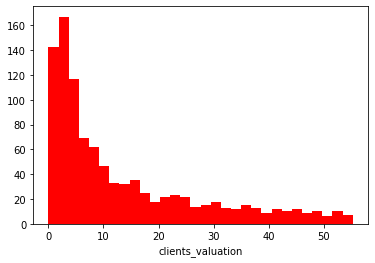

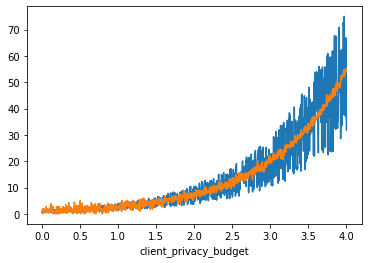

In [156]:
# plt.figure(0)
# plt.hist(clients_privacy_budget, 30)
# plt.xlabel("client_privacy_budget")
fig = plt.figure(1)
plt.xlabel("clients_valuation")

plt.figure(2)
plt.plot(clients_privacy_budget, clients_privacy_cost)
plt.xlabel("client_privacy_budget")

# plt.xlabel("privacy_budget")
# plt.ylabel("privacy_cost")

In [167]:

for server_budget in [0.2*i for i in range(30)]:
    clients_cost = [client_cost(server_budget) for i in range(client_number)]
    clients_enroll = list(filter(lambda i: clients_valuation[i] > clients_cost[i], range(client_number)))
    profits = [clients_valuation[i]-clients_cost[i] for i in clients_enroll] 
    max_profit = np.max(profits)
    sum_profit = np.sum(profits)
    
    print("server_budget = ", server_budget, "clients participate:", len(clients_enroll), "max_profit = ", max_profit, "total_profit = ", sum_profit)

server_budget =  0.0 clients participate: 887 max_profit =  62.84573025554654 total_profit =  3957.3025449930688
server_budget =  0.2 clients participate: 846 max_profit =  61.73129630077018 total_profit =  3771.232621307304
server_budget =  0.4 clients participate: 798 max_profit =  62.66180576152207 total_profit =  3562.660166225641
server_budget =  0.6000000000000001 clients participate: 736 max_profit =  61.05523152955425 total_profit =  3317.7651377220864
server_budget =  0.8 clients participate: 674 max_profit =  60.332943888427806 total_profit =  3054.339665114887
server_budget =  1.0 clients participate: 597 max_profit =  60.51120141140097 total_profit =  2781.8271977523095
server_budget =  1.2000000000000002 clients participate: 508 max_profit =  58.71140954594796 total_profit =  2471.1994911993943
server_budget =  1.4000000000000001 clients participate: 389 max_profit =  58.18079495163118 total_profit =  2138.426690119353
server_budget =  1.6 clients participate: 325 max_prof

ValueError: zero-size array to reduction operation maximum which has no identity

In [100]:
server_revenue = lambda epoch: (epoch)

server_budget =  0.1 clients participate: 1000 total_profit =  1015.6901378486244
server_budget =  0.2 clients participate: 1000 total_profit =  1133.4874120876295
server_budget =  0.30000000000000004 clients participate: 1000 total_profit =  1122.7621835337156
server_budget =  0.4 clients participate: 1000 total_profit =  1045.8460820614905
server_budget =  0.5 clients participate: 1000 total_profit =  940.1215746841532
server_budget =  0.6 clients participate: 1000 total_profit =  821.6996455102668
server_budget =  0.7 clients participate: 1000 total_profit =  697.0304283006423
server_budget =  0.7999999999999999 clients participate: 1000 total_profit =  568.9343963326662
server_budget =  0.8999999999999999 clients participate: 990 total_profit =  439.04672776674784
server_budget =  0.9999999999999999 clients participate: 805 total_profit =  326.603539377238
server_budget =  1.0999999999999999 clients participate: 673 total_profit =  239.81149642012866
server_budget =  1.2 clients pa

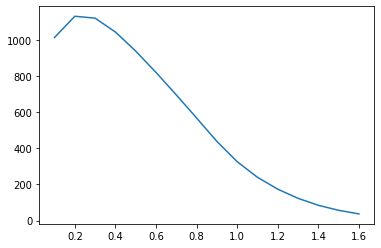

In [282]:
# increasing server_budget
epochs = 16
client_number = 1000
total_profits = []
server_budget = 0.1
server_budget_step = 0.1
server_budgetx = [server_budget+i*server_budget_step for i in range(epochs)]
clients_participating = []
min_clients = 0.2*client_number
np.random.seed = 1000
client_cost_coe = np.random.uniform(0.5, 1.5, client_number)

epoch = 1
while epoch <= epochs:
   
    clients_cost = [client_cost_coe[i]*server_budget for i in range(client_number)]
    # clients_valuation = [client_valuation(client_valuation_type, server_budget)(clients_privacy_budget[i], sigma) for i in range(client_number)]
    clients_valuation = [exp(client_valuation("gaussian", server_budget)(clients_privacy_budget[i], 1)) for i in range(client_number)]
    
    clients_enroll = list(filter(lambda i: clients_valuation[i] > clients_cost[i], range(client_number)))
    if len(clients_enroll) < min_clients:
        server_budget -= server_budget_step
        continue
    profits = [clients_valuation[i]-clients_cost[i] for i in clients_enroll] 
    clients_participating.append(len(clients_enroll))

    # server_R = server_revenue(sqrt(len(clients_enroll)))
    # max_profit = np.max(profits)
    # active_f = lambda k:*log(1+exp(k))
    active_f = lambda k: 1/(1+exp(-k)) 
    
    sum_profit = active_f(epoch)*np.sum(profits)
    # if epoch > 1 and sum_profit < total_profits[-1]:
    #     server_budget -= server_budget_step
    total_profits.append(sum_profit)
    
    print("server_budget = ", server_budget, "clients participate:", len(clients_enroll), "total_profit = ", sum_profit)
    server_budget += server_budget_step
    epoch += 1

plt.plot(server_budgetx, total_profits)

In [237]:
print(clients_participating)

[1000, 1000, 1000, 1000, 1000, 1000, 999, 987, 959, 860, 730, 614, 535, 451, 397, 346]


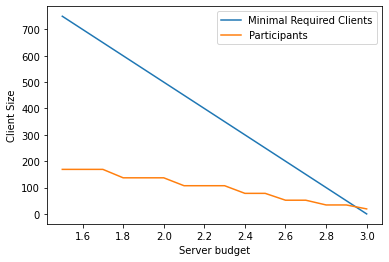

In [314]:
# decreasing server_budget
epochs = 16
client_number = 1000
clients_privacy_budget = np.sort(np.absolute(np.random.normal(mu, sigma, client_number)))
total_profits = []
clients_size = []
server_budget = 3
server_budget_step = 0.1
server_budgetx = [server_budget-i*server_budget_step for i in range(epochs)]
clients_participating = []
min_clients = 0.2*client_number
np.random.seed = 1000
client_cost_coe = np.random.uniform(0.5, 1.5, client_number)

epoch = 1
while epoch <= epochs:
    min_clients = 0.01*epoch*client_number 
    clients_cost = [client_cost_coe[i]*server_budget for i in range(client_number)]
    # clients_valuation = [client_valuation(client_valuation_type, server_budget)(clients_privacy_budget[i], sigma) for i in range(client_number)]
    clients_valuation = [exp(client_valuation("gaussian", server_budget)(clients_privacy_budget[i], 1)) for i in range(client_number)]
    
    clients_enroll = list(filter(lambda i: clients_valuation[i] > clients_cost[i], range(client_number)))
    if len(clients_enroll) < min_clients:
        server_budget -= server_budget_step
        # clients_participating.append(0)
        continue
    profits = [clients_valuation[i]-clients_cost[i] for i in clients_enroll] 
    clients_participating.append(len(clients_enroll))

    # server_R = server_revenue(sqrt(len(clients_enroll)))
    # max_profit = np.max(profits)
    # active_f = lambda k:*log(1+exp(k))
    active_f = lambda k: 1/(1+exp(-k)) 
    
    sum_profit = active_f(epoch)*np.sum(profits)
    # if epoch > 1 and sum_profit < total_profits[-1]:
    #     server_budget -= server_budget_step
    # total_profits.append(sum_profit)
    clients_size.append(len(clients_enroll))
    # print("server_budget = ", server_budget, "clients participate:", len(clients_enroll), "total_profit = ", sum_profit)
    # server_budget -= server_budget_step
    epoch += 1
plt.plot(server_budgetx, [0.05*i*client_number for i in range(epochs)], label="Minimal Required Clients")
plt.plot(server_budgetx, clients_participating, label="Participants")
plt.xlabel("Server budget")
plt.ylabel("Client Size")
plt.legend()
plt.savefig("Participants")

In [311]:
print(clients_participating)
print(server_budgetx)

[66, 121, 212, 253, 309, 369, 442, 536, 626, 626, 741, 741, 875, 875, 961, 961]
[3.0, 2.9, 2.8, 2.7, 2.6, 2.5, 2.4, 2.3, 2.2, 2.1, 2.0, 1.9, 1.7999999999999998, 1.7, 1.5999999999999999, 1.5]


In [313]:
print(np.average(server_budgetx))

2.25


server_budget =  1.0269562977782698e-15 clients participate: 578 total_profit =  349.1276535717289
server_budget =  1.0269562977782698e-15 clients participate: 578 total_profit =  420.63745108295484
server_budget =  1.0269562977782698e-15 clients participate: 578 total_profit =  454.91562437292896
server_budget =  1.0269562977782698e-15 clients participate: 578 total_profit =  468.9749635843257
server_budget =  1.0269562977782698e-15 clients participate: 578 total_profit =  474.3682713944896
server_budget =  1.0269562977782698e-15 clients participate: 578 total_profit =  476.3837025256297
server_budget =  1.0269562977782698e-15 clients participate: 578 total_profit =  477.1294539209281
server_budget =  1.0269562977782698e-15 clients participate: 578 total_profit =  477.4043883345106
server_budget =  1.0269562977782698e-15 clients participate: 578 total_profit =  477.50561079131535
server_budget =  1.0269562977782698e-15 clients participate: 578 total_profit =  477.54285925292476
server

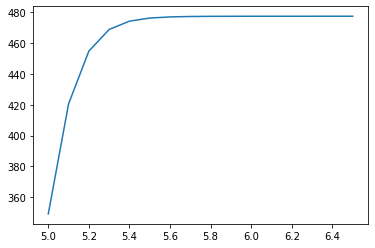

In [293]:
# decreasing server_budget
epochs = 16
client_number = 1000
clients_privacy_budget = np.sort(np.absolute(np.random.normal(mu, sigma, client_number)))
total_profits = []
server_budget = 5
server_budget_step = 0.1
server_budgetx = [server_budget+i*server_budget_step for i in range(epochs)]
clients_participating = []
min_clients = 0.5*client_number
np.random.seed = 1000
client_cost_coe = np.random.uniform(0.5, 1.5, client_number)

epoch = 1
while epoch <= epochs:
   
    clients_cost = [max(-(clients_privacy_budget[i] - server_budget), 0) + sqrt(server_budget) for i in range(client_number)]
    # clients_valuation = [client_valuation(client_valuation_type, server_budget)(clients_privacy_budget[i], sigma) for i in range(client_number)]
    clients_valuation = [2 ((client_valuation("gaussian", server_budget)(clients_privacy_budget[i], 0.21))) for i in range(client_number)]
    
    clients_enroll = list(filter(lambda i: clients_valuation[i] > clients_cost[i], range(client_number)))
    if len(clients_enroll) < min_clients:
        server_budget -= server_budget_step
        continue
    profits = [clients_valuation[i]-clients_cost[i] for i in clients_enroll] 
    clients_participating.append(len(clients_enroll))

    # server_R = server_revenue(sqrt(len(clients_enroll)))
    # max_profit = np.max(profits)
    # active_f = lambda k:*log(1+exp(k))
    active_f = lambda k: 1/(1+exp(-k)) 
    
    sum_profit = active_f(epoch)*np.sum(profits)
    # if epoch > 1 and sum_profit < total_profits[-1]:
    #     server_budget -= server_budget_step
    total_profits.append(sum_profit)
    
    print("server_budget = ", server_budget, "clients participate:", len(clients_enroll), "total_profit = ", sum_profit)
    # server_budget -= server_budget_step
    epoch += 1

plt.plot(server_budgetx, total_profits)

## Plural Query Results

In [1]:
import pickle, time
import matplotlib.pyplot as plt
from utils import sort_by_frequency
from matplotlib.patches import Rectangle

%matplotlib

Using matplotlib backend: MacOSX


In [119]:
from cProfile import label

from importlib_resources import path


def visualize_frequency(array, hhs, pem_hh=[]):
    fig, ax = plt.subplots()


    #display plot

    ax.set_xlabel("data value")
    ax.set_ylabel("count")
    # plt.plot(array) 

    array_max = max(array)
    array_min = min(array)

    mode_lower = hhs[0]
    mode_upper = mode_lower +2**(scaler+1)-1
    counts, bins, patches = plt.hist(array, bins=90, range=(array_min, array_max), facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

    counts = counts.astype('int') # it MUST be integer
    # Good old loop. Choose colormap of your taste
    for i in range(len(patches)):
        patch_low = patches[i].xy[0] 
        patch_high = patches[i].xy[0] + patches[i].get_width()
        if patch_low>= mode_lower and patch_high <= mode_upper:
            patches[i].set_facecolor("red")
        elif patch_low < mode_lower and patch_high > mode_lower:
            ax.add_patch(Rectangle((mode_lower, 0), patch_high - mode_lower, patches[i].get_height(), facecolor="red", label="mode range"))
        elif patch_low < mode_upper and patch_high > mode_upper:
            ax.add_patch(Rectangle((patch_low, 0), mode_upper - patch_low, patches[i].get_height(), facecolor="red"))
        else:
            patches[i].set_facecolor(plt.cm.viridis(counts[i]/max(counts)))


    # counts, bins, _ = ax.hist(array, bins=10, range=(array_min, array_max))
    # print(bins)
    # plt.plot([min(scaled_hhs), min(scaled_hhs),max(scaled_hhs) , max(scaled_hhs)], [0, max(counts),max(counts), 0], 'y') 

    # for hh in hhs:
    #     if hh > array_max: continue
    #     #add rectangle to plot
    #     ax.add_patch(Rectangle((hh, 0), 2**(scaler+1)-1 , max(counts),
    #                 # edgecolor = 'pink',
    #                 facecolor = 'red',
    #                 fill=True
    #                 ))
    #     print(hh, hh+ 2**(scaler+1)-1)

    # for hh in pem_hh:
    #     if hh > array_max: continue
    #     #add rectangle to plot
    #     ax.add_patch(Rectangle((hh, 0), 2**(scaler+1)-1 , max(counts), alpha=0.3,
    #                 # edgecolor = 'pink',
    #                 facecolor = 'teal',
    #                 fill=True
    #                 ))
    #     print(hh, hh+2**(scaler+1)-1) 
    
    # if pem_hh:
    #     ax.add_patch(Rectangle((0, 0), 0,  0, alpha=0.3,
    #                     # edgecolor = 'pink',
    #                     facecolor = 'teal',
    #                     fill=True, label="PEM"
    #                     ))
    ax.text(mode_lower, y = max(counts), s = f"[{mode_lower}, {mode_upper}]")
    
    ax.legend()
    plt.savefig(f"./results/mode_query_pois_{scaler}.png", dpi=1024)


In [120]:
# load results
with open("plural.txt", 'rb') as f:
    result = pickle.load(f)
predict_heavy_hitters, clients = result
# pem_hh = [7128, 7129]
scaler = 6

patches = visualize_frequency(clients, predict_heavy_hitters )

## Experiements & Results of different model

In [2]:
import pickle
import pandas as pd
import numpy as np
from PIL import Image
import sys, os
import matplotlib.pyplot as plt


### FedFT var bits_per_iter

In [60]:
path = f'results/exp_bits.txt'

with open(path, 'rb') as f:
    results = (pickle.load(f))


# for model in models:
#     print(model)
#     for i in range(3):
#         if drop_results[model][i] == 0: 
#             print('----')
#             continue
#         print(f'{(drop_results[model][i+1]-drop_results[model][0])*100/drop_results[model][0]:.2f}%')
        

In [61]:
results

{'XTF': {1: [3.7, 0.8375], 2: [3.7, 0.87], 4: [3.7, 0.7475], 8: [3.7, 0.6225]}}

In [27]:
from math import exp

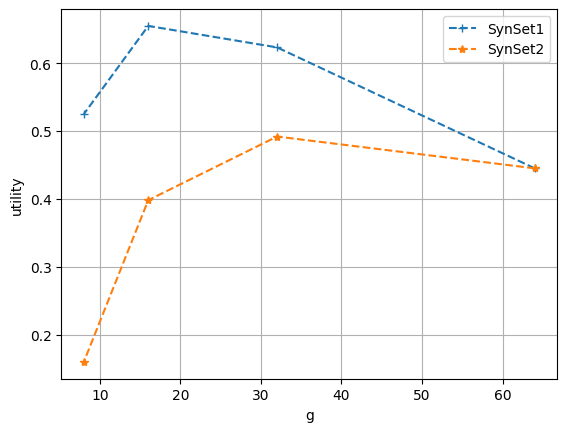

In [78]:
bits = np.array(list(results["XTF"].keys()))
bits = 64/bits
F1 = np.array([0.7225, 0.645, 0.4875, 0.2625])
complexity = np.array([7.45, 7.20, 6.94, 6.70])
complexity_norm = [ (i-np.min(complexity))/(np.max(complexity) - np.min(complexity)) for i in complexity]

complexity_diff = 2*F1 - complexity_norm
with open("results/exp_bits_99413.txt", "rb") as f:
    F1_large, complexity_diff_large = pickle.load(f)
with open("results/exp_bits_2184.txt", "rb") as f:
    F1_small, complexity_diff_small = pickle.load(f)
# plt.plot(bits, F1)
plt.ylabel("utility")
plt.xlabel("g")
plt.grid(True)
plt.plot(bits, complexity_diff_large, '+--', label="SynSet1")
plt.plot(bits, complexity_diff_small[:-2], "*--", label="SynSet2")
plt.legend()
plt.savefig('opt_g.png', dpi=1024)

In [139]:
results

{'XTF': {1: [3.7, 0.7225],
  2: [3.7, 0.645],
  4: [3.7, 0.4875],
  8: [3.7, 0.2625],
  16: 0,
  32: 0}}

### FedFT, PEM, TrieHH connection failure rate ploting

In [5]:
for n in [2716, 4642, 9004, 90740, 99411]:
    dir = f"results/connectionloss_{n}"
    # connectionloss = [0.0, 0.2,  0.4,  0.6]

    # models = {"FedFT": lambda x: f"fedft_cls{x}_F1", 'PEM': lambda x: f"pem_cls{x}_F1", "TrieHH": lambda x: f"triehh_cls{x}_F1"}

    # results = {}
    # for cnls in connectionloss:
    #     for model in models:
    #         path = models[model](cnls)
    #         with open(os.path.join(dir, path), 'rb') as f:
    #             x, y = (pickle.load(f))
    #         results[model] = {}
    #         results[model]['x'] = x
    #         results[model]['y'] = y
    #         fig = plt.figure()

    #     color = ['red', 'teal', "lightslategrey"]

    #     for i, model in enumerate(list(models.keys())):
    #         if model == "PEM":
    #             model_name = "PEM (GTU)"
    #         elif model == "FedFT":
    #             model_name = "FedFT (XTF)"
    #         else:
    #             model_name = model
    #         plt.plot(results[model]['x'], results[model]['y'], '|-', color=color[i], label=model_name)
    #     plt.legend(loc="upper left")
    #     plt.xlabel(r"$\varepsilon$")
    #     plt.ylabel("F1 score")
    #     plt.title(f"Connection Failure Rate = {cnls}")
    #     plt.savefig(os.path.join(dir, f"connectionloss_{cnls}.png"), dpi=200)

    figure_paths  = []
    
    for file in os.listdir(dir):
        # print(file)
        if file.startswith("connection"):
            figure_paths.append(os.path.join(dir, file))

    figure_paths = sorted(figure_paths)
    concatenated = Image.fromarray(
    np.concatenate(
        [np.array(Image.open(x)) for x in figure_paths],
        axis=1
    )
    )
    concatenated.save(os.path.join(dir, f"concate_connectionloss_{n}.png"))



In [3]:
import numpy as np
from PIL import Image
concatenated = Image.fromarray(
np.concatenate(
    [np.array(Image.open(x)) for x in ['results/zipfs_2.png', 'results/zipfs_1.png']],
    axis=1
)
)
concatenated.save(os.path.join('results', f"zipfs_0.png"))


### FedFT, PEM, TrieHH drop rate with connection failure

In [6]:
connectionloss = [0.0, 0.2, 0.4, 0.6]
k =9
print(results["FedFT"]['x'][k])



for n in [2716, 4642, 9004, 90740, 99411]:
    print("n = ", n)
    dir = f'results/connectionloss_{n}'
    drop_results = {}
    for cnls in connectionloss:
        
        for model in models:
            path = models[model](cnls)
            with open(os.path.join(dir, path), 'rb') as f:
                x, y = (pickle.load(f))
            drop_results[model] = drop_results.get(model, []) + [y[k]]

    for model in models:
        print(model)
        for i in range(3):
            if drop_results[model][i] == 0: 
                print('----')
                continue
            print(f'{(drop_results[model][i+1]-drop_results[model][0])*100/drop_results[model][0]:.2f}%')
            

NameError: name 'results' is not defined

In [98]:
def results_to_csv(exp_name):
    with open(f"./results/{exp_name}.txt", 'rb') as f:
        results = pickle.load(f)
    models = list(results.keys())
    connectionloss = [i for i in results[models[0]].keys()]

    df = pd.DataFrame([
        (model, ctl, results[model][ctl]) for ctl in connectionloss for model in models
    ], columns=["model", "connectionloss", 'results'])
    vars = df.results[0][0]
    for var in vars:
        df[f"var={var}"] = None
    # df
    rows = len(df)
    for row in range(rows):
        for i, var in enumerate(vars):
            df.at[row,f"var={var}"] = df.results[row][1][i]
    del df["results"]
    df.to_csv(f"./results/{exp_name}.csv")


In [3]:
exp_2184 = {}
exp_99413 = {}

with open(f"./results/exp_zipf_2184.txt", 'rb') as f:
        results = pickle.load(f)
models = list(results.keys())


In [4]:
for model in models:
    exp_2184[model] = {"x": None, "y": None}
    exp_2184[model]['x'] = results[model][0][0]
    exp_2184[model]['y'] = results[model][0][1]

In [5]:
with open(f"./results/exp_zipf_99413.txt", 'rb') as f:
        results = pickle.load(f)
for model in models:
    exp_99413[model] = {"x": None, "y": None}
    exp_99413[model]['x'] = results[model][0][0]
    exp_99413[model]['y'] = results[model][0][1]      

In [6]:
models.append("TrieHH")
triehh_99413 = [[0.5, 1.1, 1.7000000000000002, 2.3000000000000003, 2.9000000000000004, 3.5000000000000004, 4.1000000000000005, 4.7, 5.3, 5.8999999999999995, 6.499999999999999, 7.099999999999999, 7.699999999999998, 8.299999999999999, 8.899999999999999], [0.23288888888888878, 0.461090909090909, 0.5595151515151519, 0.6808391608391612, 0.7671794871794871, 0.8336703296703293, 0.8777289377289371, 0.9111666666666659, 0.9506190476190471, 0.9584999999999999, 0.9536666666666668, 0.9475, 0.9775, 0.945, 0.955]]
exp_99413["TrieHH"] = {}
exp_99413["TrieHH"]['x'] = triehh_99413[0]
exp_99413["TrieHH"]['y'] = triehh_99413[1]

triehh_2184 = [[0.5, 1.1, 1.7000000000000002, 2.3000000000000003, 2.9000000000000004, 3.5000000000000004, 4.1000000000000005, 4.7, 5.3, 5.8999999999999995, 6.499999999999999, 7.099999999999999, 7.699999999999998, 8.299999999999999, 8.899999999999999], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0044444444444444444, 0.008888888888888889, 0.06222222222222224, 0.0666666666666667, 0.14222222222222228, 0.18222222222222217, 0.20888888888888876, 0.22222222222222204]]
exp_2184["TrieHH"] = {}
exp_2184["TrieHH"]['x'] = triehh_2184[0]
exp_2184["TrieHH"]['y'] = triehh_2184[1]


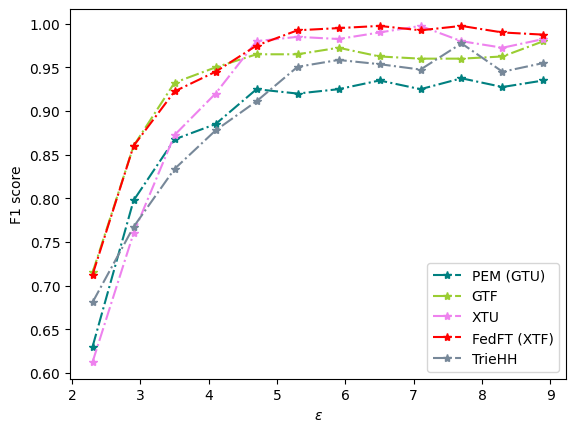

In [16]:
color = ['teal', 'yellowgreen', "violet", 'red', "lightslategrey"]

for i in range(len(models)):
        if models[i] == "PEM":
            model_name = "PEM (GTU)"
        elif models[i] == "XTF":
            model_name = "FedFT (XTF)"
        else:
            model_name = models[i]
        # fig = plt.figure(1)
        plt.plot(exp_2184[models[i]]['x'][3:], exp_2184[models[i]]['y'][3:], '.--', color=color[i], label=model_name)
        # fig = plt.figure(2)
        plt.plot(exp_2184[models[i]]['x'][3:], exp_99413[models[i]]['y'][3:], '*-.', color=color[i], label=model_name)

plt.legend(loc="lower right")
plt.xlabel(r"$\varepsilon$")
plt.ylabel("F1 score")
plt.savefig("./results/zipfs.png", dpi=200)

In [91]:
a = []
for value in exp_2184.values():
    a.append(value['y'])

In [92]:
a = [i[6] for i in a] # 4.7

In [93]:
print(models)
print('f1: ,', a )
f1 = {}
for i, model in enumerate(models):
    f1[model] = a[i]

['PEM', 'GTF', 'XTU', 'XTF', 'TrieHH']
f1: , [0.3669761904761904, 0.4175, 0.5425, 0.6325, 0.0]


In [95]:
72.35-13.77-47.83

10.75

In [94]:
# GTU (PEM) vs XTU
print(f"XTU & ", f'{(f1["XTU"]- f1["PEM"])*100/f1["PEM"] :.2f}', "%")
print(f"GTF & ", f'{(f1["GTF"]- f1["PEM"])*100/f1["PEM"] :.2f}', "%")
print(f"XTF & ", f'{(f1["XTF"]- f1["PEM"])*100/f1["PEM"] :.2f}', "%")


XTU &  47.83 %
GTF &  13.77 %
XTF &  72.35 %
